In [1]:
#from cassandra.cluster import Cluster
import pandas as pd 
import collections
import numpy as np

In [2]:
import csv

col_list = ["movieId", "title","genres"]

df = pd.read_csv("/home/spetz/Downloads/archive/movie.csv", usecols=col_list)
#file.readlines()
for_query2=df
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [3]:
df=df.drop(columns=["genres"])


In [4]:
columns_list = ["userId", "movieId","rating","timestamp"]
dx=pd.read_csv("/home/spetz/Downloads/archive/rating.csv", usecols=columns_list)
dx=dx.sort_values("movieId")
dx=dx[:10000000]
dx

,userId,movieId,rating,timestamp
14162882,97809,1,3.0,2008-06-11 04:47:11
15347420,106140,1,5.0,2013-01-29 03:33:49
15347355,106138,1,3.0,2002-07-31 15:48:53
10170195,70354,1,4.5,2011-02-13 18:55:40
10170255,70355,1,3.5,2008-01-26 16:56:54
...,...,...,...,...
7816716,53914,2167,4.0,2003-04-09 00:25:00
8114556,55895,2167,4.0,2005-01-30 21:04:59
10750246,74315,2167,2.0,2000-04-05 02:33:11
19621413,135822,2167,1.0,2000-08-02 02:31:03


In [5]:
dx=dx.drop(columns=["userId"])
dx



,movieId,rating,timestamp
14162882,1,3.0,2008-06-11 04:47:11
15347420,1,5.0,2013-01-29 03:33:49
15347355,1,3.0,2002-07-31 15:48:53
10170195,1,4.5,2011-02-13 18:55:40
10170255,1,3.5,2008-01-26 16:56:54
...,...,...,...
7816716,2167,4.0,2003-04-09 00:25:00
8114556,2167,4.0,2005-01-30 21:04:59
10750246,2167,2.0,2000-04-05 02:33:11
19621413,2167,1.0,2000-08-02 02:31:03


In [6]:

dt = dx.sort_values('timestamp').drop_duplicates(['movieId','rating'], keep='last')
dt

,movieId,rating,timestamp
13768535,109,5.0,1996-03-19 04:44:10
19549902,625,5.0,1996-03-28 08:55:52
10594753,752,5.0,1996-05-17 19:08:16
10594712,655,5.0,1996-05-17 19:09:07
12054970,666,1.0,1996-05-22 10:44:15
...,...,...,...
8378393,924,4.5,2015-03-31 05:43:51
8378412,1653,3.5,2015-03-31 05:44:40
8378405,1240,5.0,2015-03-31 05:50:01
8378411,1590,3.5,2015-03-31 05:51:49


In [7]:
new_list = list()
dicts={}
dxx = dx[(dx['timestamp'] > '2015-01-01') & (dx['timestamp'] <= '2015-01-02')]
for i in range(len(dxx)):
    ar = dxx.loc[(dx['movieId'] == i ) & (dx['rating'] <= 5)]
    rating=ar.apply("rating").sum()
    movies_num=ar['movieId'].value_counts()
    x=sum(rating/movies_num)
    new_list.append(x)
    
    first_value = dxx['movieId'].iat[i]
    dicts[i] = new_list[i]





In [8]:
dicts={x:y for x,y in dicts.items() if y!=0}
#ERWTIMA3
def compare_dict_values(dictionary, given_float):
    return {i: dictionary[i] for i in dictionary if dictionary[i] > given_float}


final_table=compare_dict_values(dicts,0.1)
final_table = pd.DataFrame(list(final_table.items()), columns=['movieId', 'rating'])

final_table

,movieId,rating
0,1,3.750000
1,2,2.300000
2,3,3.000000
3,5,1.000000
4,6,4.333333
...,...,...
209,1104,3.250000
210,1120,3.500000
211,1128,3.500000
212,1136,4.071429


In [9]:
#QUERY1
df
first_query = df.merge(final_table, on="movieId", how = 'inner')
first_query=first_query.nlargest(30, ['rating'])
n=first_query.drop(columns=['movieId'])
#first_query

#ADD TIMESTAMP
dt = dxx.sort_values('timestamp').drop_duplicates(['movieId','rating'], keep='last')

f=dt.drop(['rating'], axis=1)
f
timequery = first_query.merge(f, on="movieId", how = 'inner')
timequery=timequery.nlargest(70,['rating'])
timequery = timequery.sort_values('timestamp').drop_duplicates(['movieId','title','rating'], keep='last')

#final query1 with timestamp
timequery


,movieId,title,rating,timestamp
1,628,Primal Fear (1996),5.000000,2015-01-01 00:39:21
23,928,Rebecca (1940),4.500000,2015-01-01 08:55:42
55,364,"Lion King, The (1994)",4.250000,2015-01-01 09:00:05
14,306,Three Colors: Red (Trois couleurs: Rouge) (1994),4.500000,2015-01-01 11:15:40
15,307,Three Colors: Blue (Trois couleurs: Bleu) (1993),4.500000,2015-01-01 11:16:38
0,599,"Wild Bunch, The (1969)",5.000000,2015-01-01 11:25:51
27,1031,Bedknobs and Broomsticks (1971),4.500000,2015-01-01 17:41:15
16,509,"Piano, The (1993)",4.500000,2015-01-01 18:41:34
22,916,Roman Holiday (1953),4.500000,2015-01-01 20:46:10
13,229,Death and the Maiden (1994),4.500000,2015-01-01 20:55:07


In [10]:
Query1 = pd.DataFrame(list(dicts.items()), columns=['movieId', 'rating'])

final_query = Query1.merge(df, on="movieId", how = 'inner')
final_query = final_query.dropna()

final_query = final_query.merge(f, on="movieId", how = 'inner')
final_query = final_query.sort_values('timestamp').drop_duplicates(['movieId','rating','title'], keep='last')


final_query

,movieId,rating,title,timestamp
260,628,5.00,Primal Fear (1996),2015-01-01 00:39:21
8,3,3.00,Grumpier Old Men (1995),2015-01-01 01:54:31
77,161,1.50,Crimson Tide (1995),2015-01-01 02:31:22
221,553,4.00,Tombstone (1993),2015-01-01 05:05:37
228,587,1.50,Ghost (1990),2015-01-01 07:37:34
...,...,...,...,...
311,866,2.75,Bound (1996),2015-01-01 23:21:34
90,223,4.25,Clerks (1994),2015-01-01 23:35:15
399,1091,3.50,Weekend at Bernie's (1989),2015-01-01 23:42:42
185,472,1.00,I'll Do Anything (1994),2015-01-01 23:57:27


In [11]:
#QUERYY2
for_query2


final_query2 = for_query2.merge(Query1, on="movieId", how = 'inner')

final_query2


,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.750000
1,2,Jumanji (1995),Adventure|Children|Fantasy,2.300000
2,3,Grumpier Old Men (1995),Comedy|Romance,3.000000
3,5,Father of the Bride Part II (1995),Comedy,1.000000
4,6,Heat (1995),Action|Crime|Thriller,4.333333
...,...,...,...,...
209,1104,"Streetcar Named Desire, A (1951)",Drama,3.250000
210,1120,"People vs. Larry Flynt, The (1996)",Comedy|Drama,3.500000
211,1128,"Fog, The (1980)",Horror,3.500000
212,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,4.071429


In [12]:

col_list=['userId','movieId','tag','timestamp']
dyy = pd.read_csv("/home/spetz/Downloads/archive/tag.csv", usecols=col_list)

In [13]:
dyy=dyy.drop(columns=['userId','timestamp'])
dyy
final_query22 = final_query2.merge(dyy, on="movieId", how = 'inner')

In [14]:
final_query22



,movieId,title,genres,rating,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.750000,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.750000,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.750000,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.750000,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.750000,TÃ©a Leoni does not star in this movie
...,...,...,...,...,...
38049,1148,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime,4.166667,british
38050,1148,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime,4.166667,claymation
38051,1148,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime,4.166667,penguins
38052,1148,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime,4.166667,stop motion


In [15]:
#QUERY3
final_query3=final_query2.drop(columns=["movieId",'genres','rating'])


In [16]:
final_query3


,title
0,Toy Story (1995)
1,Jumanji (1995)
2,Grumpier Old Men (1995)
3,Father of the Bride Part II (1995)
4,Heat (1995)
...,...
209,"Streetcar Named Desire, A (1951)"
210,"People vs. Larry Flynt, The (1996)"
211,"Fog, The (1980)"
212,Monty Python and the Holy Grail (1975)


In [17]:
only_numbers=final_query3['title'].str.extract('(\d+)')
only_numbers.columns=['years']

In [18]:
only_numbers
final_query2['years']= only_numbers['years']
final_query2
query3=final_query2
query3


,movieId,title,genres,rating,years
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.750000,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,2.300000,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.000000,1995
3,5,Father of the Bride Part II (1995),Comedy,1.000000,1995
4,6,Heat (1995),Action|Crime|Thriller,4.333333,1995
...,...,...,...,...,...
209,1104,"Streetcar Named Desire, A (1951)",Drama,3.250000,1951
210,1120,"People vs. Larry Flynt, The (1996)",Comedy|Drama,3.500000,1996
211,1128,"Fog, The (1980)",Horror,3.500000,1980
212,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,4.071429,1975


In [19]:
#query4
query4=final_query22
query5=final_query22
query4

,movieId,title,genres,rating,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.750000,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.750000,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.750000,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.750000,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.750000,TÃ©a Leoni does not star in this movie
...,...,...,...,...,...
38049,1148,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime,4.166667,british
38050,1148,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime,4.166667,claymation
38051,1148,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime,4.166667,penguins
38052,1148,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime,4.166667,stop motion


In [100]:

final_query.to_csv("/home/spetz/Downloads/archive/query1.csv")
final_query22.to_csv("/home/spetz/Downloads/archive/query2.csv")
query3.to_csv("/home/spetz/Downloads/archive/query3.csv")
query4.to_csv("/home/spetz/Downloads/archive/query4.csv")
query5.to_csv("/home/spetz/Downloads/archive/query5.csv")
timequery.to_csv("/home/spetz/Downloads/archive/query11.csv")

In [331]:
#CASSANDRA 

#CREATE KEYSPACE web3 WITH replication = {'class':'SimpleStrategy', 'replication_factor' : 1};
from cassandra.cluster import Cluster
import logging as log
cluster =Cluster(['0.0.0.0'], port=9042)
session = cluster.connect("web3")
session.execute("""use web3;""")
log.info('dropped table devices.')



In [332]:
#CREATE TABLES INTO CASSANDRA


session.execute("""CREATE TABLE query1(
        movieId int,
        title text,
        rating float,
	timestamp timestamp ,
        PRIMARY KEY(title,timestamp,rating));""")



###################################################################################################################################
session.execute("""CREATE TABLE query2(
        movieId int,
        title text,
        genres text,
        rating float,
        tag text,
        PRIMARY KEY(movieId,title));""")

###################################################################################################################################

session.execute("""CREATE TABLE query3(
        movieId int,
        title text,
        genres text,
        rating float,
        years int,
        PRIMARY KEY((genres),years));""")

###################################################################################################################################

session.execute("""CREATE TABLE query4(
        movieId int,
        title text,
        genres text,
        rating float,
        tag text,
        PRIMARY KEY(rating,title));""")
###################################################################################################################################

session.execute("""CREATE TABLE query5(
        movieId int,
        title text,
        genres text,
        rating float,
        tag text,
        PRIMARY KEY((tag),rating));""")


In [144]:
#INSERT DATA INTO CASSANDRA

from cassandra import ConsistencyLevel
from cassandra.query import SimpleStatement
from cassandra.query import BatchStatement, SimpleStatement

#QUERY1
array1=timequery['movieId']
array2=timequery['title']
array3=timequery['rating']
array4=pd.to_datetime(timequery['timestamp'])

prep_statement = session.prepare("INSERT INTO query1 (movieId,title, rating,timestamp) VALUES (?, ?, ? ,?)")
for data1,data2,data3,data4 in zip(array1,array2,array3,array4):
        session.execute(prep_statement, [data1, data2,data3,data4])


#QUERY2
array1=final_query22['movieId']
array2=final_query22['title']
array3=final_query22['genres']
array4=final_query22['rating']
array5=final_query22['tag']

prep_statement = session.prepare("INSERT INTO query2 (movieId, title,genres,rating,tag) VALUES (?, ?,?,?,?)")
for data1,data2,data3,data4,data5 in zip(array1,array2,array3,array4,array5):
        session.execute(prep_statement, [data1, data2,data3,data4,data5])



#QUERY3
array1=query3['movieId']
array2=query3['title']
array3=query3['genres']
array4=query3['rating']
array5=query3['years'].astype(int)

prep_statement = session.prepare("INSERT INTO query3 (movieId, title,genres,rating,years) VALUES (?, ?,?,?,?)")
for data1,data2,data3,data4,data5 in zip(array1,array2,array3,array4,array5):
        session.execute(prep_statement, [data1, data2,data3,data4,data5])


#QUERY4
array1=query4['movieId']
array2=query4['title']
array3=query4['genres']
array4=query4['rating']
array5=query4['tag']

prep_statement = session.prepare("INSERT INTO query4 (movieId, title,genres,rating,tag) VALUES (?, ?,?,?,?)")
for data1,data2,data3,data4,data5 in zip(array1,array2,array3,array4,array5):
        session.execute(prep_statement, [data1, data2,data3,data4,data5])
#QUERY5
array1=query5['movieId']
array2=query5['title']
array3=query5['genres']
array4=query5['rating']
array5=query5['tag']

prep_statement = session.prepare("INSERT INTO query5 (movieId, title,genres,rating,tag) VALUES (?, ?,?,?,?)")
for data1,data2,data3,data4,data5 in zip(array1,array2,array3,array4,array5):
        session.execute(prep_statement, [data1, data2,data3,data4,data5])




In [348]:

#select 1

select1=session.execute("select title,rating from query1 where  timestamp >= '2015-01-01 00:00:00.000000+0000' AND timestamp <='2015-01-15 00:00:00.000000+0000'  ALLOW FILTERING;")

#select 2

select2=session.execute("select * from query2 where title='Jumanji (1995)' ALLOW FILTERING;")

       
#select 3
#session.execute("CREATE CUSTOM INDEX employee_firstname_idx12 ON query3 (genres) USING 'org.apache.cassandra.index.sasi.SASIIndex' WITH OPTIONS = {'mode': 'CONTAINS', 'analyzer_class': 'org.apache.cassandra.index.sasi.analyzer.StandardAnalyzer', 'case_sensitive': 'false'};")

select3=session.execute("select title from query3 where genres LIKE '%Drama' order by years desc;")


#select 4
#session.execute("CREATE CUSTOM INDEX employee_firstname_idx ON query4 (title) USING 'org.apache.cassandra.index.sasi.SASIIndex' WITH OPTIONS = {'mode': 'CONTAINS', 'analyzer_class': 'org.apache.cassandra.index.sasi.analyzer.StandardAnalyzer', 'case_sensitive': 'false'};")
select4=session.execute("select title from query4 WHERE title LIKE '%Blade%' ALLOW FILTERING;")

#select 5
select5=session.execute("select title from query5 WHERE tag='Comedy' order by rating desc limit 20 ALLOW FILTERING;")







In [159]:
#DROP TIN VASI GIA NA EKTELESOUME TO ERWTIMA 4 KAI NA PAROUME XRONOUS


In [333]:
#INSERT DATA INTO CASSANDRA
#ALTER KEYSPACE new WITH replication = { 'class' : 'SimpleStrategy', 'replication_factor' : 1 };
from cassandra import ConsistencyLevel
from cassandra.query import SimpleStatement
from cassandra.query import BatchStatement, SimpleStatement
import time
import matplotlib.pyplot as plt

#QUERY 1
array1=timequery['title']
array2=timequery['timestamp']
array3=timequery['rating']
array4=timequery['movieId']

maxtime1=list()



start_time = time.process_time_ns()

batch1 = BatchStatement(consistency_level=ConsistencyLevel.QUORUM)
for data1,data2,data3,data4 in zip(array1,array2,array3,array4):
    batch1.add(SimpleStatement("INSERT INTO query1 (title, timestamp,rating,movieId) VALUES (%s, %s,%s,%s)"), (data1, data2,data3,data4))


end = time.process_time_ns()
final = end - start_time
maxtime1.append(final)

X=session.execute(batch1)


print("--- %s nanoseconds ---" % (maxtime1))



--- [3612217] nanoseconds ---


In [334]:
#INSERT DATA INTO CASSANDRA
#ALTER KEYSPACE new1 WITH replication = { 'class' : 'SimpleStrategy', 'replication_factor' : 1 };
from cassandra import ConsistencyLevel
from cassandra.query import SimpleStatement
from cassandra.query import BatchStatement, SimpleStatement
import time
#QUERY 2

array1=final_query22['movieId']
array2=final_query22['title']
array3=final_query22['genres']
array4=final_query22['rating']
array5=final_query22['tag']


maxtime2=list()


start_time = time.process_time_ns()

batch2 = BatchStatement(consistency_level=ConsistencyLevel.QUORUM)
for data1,data2,data3,data4,data5 in zip(array1,array2,array3,array4,array5):
    batch2.add(SimpleStatement("INSERT INTO query2 (movieId, title,genres,rating,tag) VALUES (%s, %s,%s,%s,%s)"), (data1, data2,data3,data4,data5))


end = time.process_time_ns()
final = end - start_time
maxtime2.append(final)

X2=session.execute(batch2)


print("--- %s nanoseconds ---" % (maxtime2))



--- [209255601] nanoseconds ---


In [335]:
#INSERT DATA INTO CASSANDRA
#ALTER KEYSPACE new1 WITH replication = { 'class' : 'SimpleStrategy', 'replication_factor' : 1 };
from cassandra import ConsistencyLevel
from cassandra.query import SimpleStatement
from cassandra.query import BatchStatement, SimpleStatement
import time


#QUERY 3
array1=query3['movieId']
array2=query3['title']
array3=query3['genres']
array4=query3['rating']
array5=query3['years'].astype(int)


maxtime3=list()




start_time = time.process_time_ns()

batch3 = BatchStatement(consistency_level=ConsistencyLevel.QUORUM)
for data1,data2,data3,data4,data5 in zip(array1,array2,array3,array4,array5):
    batch3.add(SimpleStatement("INSERT INTO query3 (movieId, title,genres,rating,years) VALUES (%s, %s,%s,%s,%s)"), (data1, data2,data3,data4,data5))



end = time.process_time_ns()
final = end - start_time
maxtime3.append(final)

X2=session.execute(batch3)


print("--- %s nanoseconds ---" % (maxtime3))



--- [4246246] nanoseconds ---


In [336]:
from cassandra import ConsistencyLevel
from cassandra.query import SimpleStatement
from cassandra.query import BatchStatement, SimpleStatement
import time
#QUERY 4

array1=query4['movieId']
array2=query4['title']
array3=query4['genres']
array4=query4['rating']
array5=query4['tag']

maxtime4=list()



  
start_time = time.process_time_ns()

batch4 = BatchStatement(consistency_level=ConsistencyLevel.QUORUM)
for data1,data2,data3,data4,data5 in zip(array1,array2,array3,array4,array5):
    batch4.add(SimpleStatement("INSERT INTO query4 (movieId, title,genres,rating,tag) VALUES  (%s, %s,%s,%s,%s)"), (data1, data2,data3,data4,data5))


end = time.process_time_ns()
final = end - start_time
maxtime4.append(final)

X3=session.execute(batch4)


print("--- %s nanoseconds ---" % (maxtime4))




--- [521774423] nanoseconds ---


100
--- [1970341] nanoseconds ---
SUNOLIKOS MESOS XRONOS EKTELESIS KAI TON 5 QUERY EINAI: 148171765.6
738309696
148171765.6


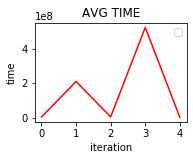

In [337]:
from cassandra import ConsistencyLevel
from cassandra.query import SimpleStatement
from cassandra.query import BatchStatement, SimpleStatement
import time
#QUERY 5
#ALTER TABLE new2.query5
   #WITH compression = {'class': 'LZ4Compressor', 'chunk_length_in_kb': 64, 'crc_check_chance': 0.5};


array1=query5['movieId']
array2=query5['title']
array3=query5['genres']
array4=query5['rating']
array5=query5['tag']
maxtime5=list()



start_time = time.process_time_ns()

batch5 = BatchStatement(consistency_level=ConsistencyLevel.QUORUM)
for data1,data2,data3,data4,data5 in zip(array1,array2,array3,array4,array5):
    batch5.add(SimpleStatement("INSERT INTO query5 (movieId, title,genres,rating,tag) VALUES (%s, %s,%s,%s,%s)"), (data1, data2,data3,data4,data5))


end = time.process_time_ns()
final = end - start_time
maxtime5.append(final)
  

X5=session.execute(batch5)


print("--- %s nanoseconds ---" % (maxtime5))


oliko_time1=sum(maxtime1+maxtime2+maxtime3+maxtime4+maxtime5)/5

oliko_time_graph=maxtime1+maxtime2+maxtime3+maxtime4+maxtime5

print("SUNOLIKOS MESOS XRONOS EKTELESIS KAI TON 5 QUERY EINAI:",oliko_time1)

print(oliko_time)
print(oliko_time1)


plt.figure(0)
plt.subplot(2, 2, 1)
plt.plot(oliko_time_graph,color='red')
plt.title("AVG TIME")
plt.ylabel("time")
plt.xlabel("iteration")
plt.legend()


--- [225137856] nanoseconds ---


1 ITERATION 
<-------------------ITERATION 1 COMPLETED ----------------->
2 ITERATION 
<-------------------ITERATION 2 COMPLETED ----------------->
3 ITERATION 
<-------------------ITERATION 3 COMPLETED ----------------->
4 ITERATION 
<-------------------ITERATION 4 COMPLETED ----------------->
5 ITERATION 
<-------------------ITERATION 5 COMPLETED ----------------->
6 ITERATION 
<-------------------ITERATION 6 COMPLETED ----------------->
7 ITERATION 
<-------------------ITERATION 7 COMPLETED ----------------->
8 ITERATION 
<-------------------ITERATION 8 COMPLETED ----------------->
9 ITERATION 
<-------------------ITERATION 9 COMPLETED ----------------->
10 ITERATION 
<-------------------ITERATION 10 COMPLETED ----------------->
--- 1630127.3 nanoseconds ---


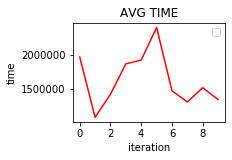

In [319]:
#session.execute("CONSISTENCY ALL;")
#TIME FOR SELECT1

select1time=list()
for i in range(10):
    print("%d ITERATION "%(i+1))
    start_time = time.process_time_ns()
    select1=session.execute("select title,rating from query1 where  timestamp >= '2015-01-01 00:00:00.000000+0000' AND timestamp <='2015-01-15 00:00:00.000000+0000' ALLOW FILTERING;")


    print("<-------------------ITERATION %d COMPLETED ----------------->" %(i+1))

    end = time.process_time_ns()
    final = end - start_time
    select1time.append(final)


avgtime1 = (sum(select1time)/len(select1time))

print("--- %s nanoseconds ---" % (avgtime1))

plt.figure(0)
plt.subplot(2, 2, 1)
plt.plot(select1time,color='red')
plt.title("AVG TIME")
plt.ylabel("time")
plt.xlabel("iteration")
plt.legend()

1 ITERATION 
<-------------------ITERATION 1 COMPLETED ----------------->
2 ITERATION 
<-------------------ITERATION 2 COMPLETED ----------------->
3 ITERATION 
<-------------------ITERATION 3 COMPLETED ----------------->
4 ITERATION 
<-------------------ITERATION 4 COMPLETED ----------------->
5 ITERATION 
<-------------------ITERATION 5 COMPLETED ----------------->
6 ITERATION 
<-------------------ITERATION 6 COMPLETED ----------------->
7 ITERATION 
<-------------------ITERATION 7 COMPLETED ----------------->
8 ITERATION 
<-------------------ITERATION 8 COMPLETED ----------------->
9 ITERATION 
<-------------------ITERATION 9 COMPLETED ----------------->
10 ITERATION 
<-------------------ITERATION 10 COMPLETED ----------------->
--- 1432390.3 nanoseconds ---


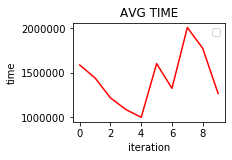

In [320]:
#session.execute("CONSISTENCY QUORUM;")
#TIME FOR SELECT2

select2time=list()
for i in range(10):
    print("%d ITERATION "%(i+1))
    start_time = time.process_time_ns()
    select2=session.execute("select * from query2 where title='Jumanji (1995)' ALLOW FILTERING;")

    print("<-------------------ITERATION %d COMPLETED ----------------->" %(i+1))

    end = time.process_time_ns()
    final = end - start_time
    select2time.append(final)


avgtime2 = (sum(select2time)/len(select2time))

print("--- %s nanoseconds ---" % (avgtime2))

plt.figure(0)
plt.subplot(2, 2, 1)
plt.plot(select2time,color='red')
plt.title("AVG TIME")
plt.ylabel("time")
plt.xlabel("iteration")
plt.legend()

1 ITERATION 
<-------------------ITERATION 1 COMPLETED ----------------->
2 ITERATION 
<-------------------ITERATION 2 COMPLETED ----------------->
3 ITERATION 
<-------------------ITERATION 3 COMPLETED ----------------->
4 ITERATION 
<-------------------ITERATION 4 COMPLETED ----------------->
5 ITERATION 
<-------------------ITERATION 5 COMPLETED ----------------->
6 ITERATION 
<-------------------ITERATION 6 COMPLETED ----------------->
7 ITERATION 
<-------------------ITERATION 7 COMPLETED ----------------->
8 ITERATION 
<-------------------ITERATION 8 COMPLETED ----------------->
9 ITERATION 
<-------------------ITERATION 9 COMPLETED ----------------->
10 ITERATION 
<-------------------ITERATION 10 COMPLETED ----------------->
--- 1399324.0 nanoseconds ---


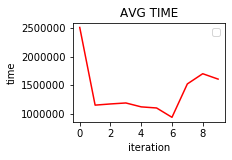

In [321]:
#session.execute("CONSISTENCY QUORUM;")
#TIME FOR SELECT3

select3time=list()
for i in range(10):
    print("%d ITERATION "%(i+1))
    start_time = time.process_time_ns()
    select3=session.execute("select title from query3 where genres='Drama' order by years desc;")

    print("<-------------------ITERATION %d COMPLETED ----------------->" %(i+1))

    end = time.process_time_ns()
    final = end - start_time
    select3time.append(final)


avgtime3 = (sum(select3time)/len(select3time))

print("--- %s nanoseconds ---" % (avgtime3))

plt.figure(0)
plt.subplot(2, 2, 1)
plt.plot(select3time,color='red')
plt.title("AVG TIME")
plt.ylabel("time")
plt.xlabel("iteration")
plt.legend()

1 ITERATION 
<-------------------ITERATION 1 COMPLETED ----------------->
2 ITERATION 
<-------------------ITERATION 2 COMPLETED ----------------->
3 ITERATION 
<-------------------ITERATION 3 COMPLETED ----------------->
4 ITERATION 
<-------------------ITERATION 4 COMPLETED ----------------->
5 ITERATION 
<-------------------ITERATION 5 COMPLETED ----------------->
6 ITERATION 
<-------------------ITERATION 6 COMPLETED ----------------->
7 ITERATION 
<-------------------ITERATION 7 COMPLETED ----------------->
8 ITERATION 
<-------------------ITERATION 8 COMPLETED ----------------->
9 ITERATION 
<-------------------ITERATION 9 COMPLETED ----------------->
10 ITERATION 
<-------------------ITERATION 10 COMPLETED ----------------->
--- 1484386.9 nanoseconds ---


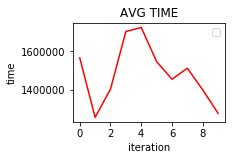

In [322]:
#TIME FOR SELECT4
select4time=list()
for i in range(10):
    print("%d ITERATION "%(i+1))
    start_time = time.process_time_ns()
    select4=session.execute("select title from query4 WHERE title LIKE '%Blade%' ALLOW FILTERING;")

    print("<-------------------ITERATION %d COMPLETED ----------------->" %(i+1))

    end = time.process_time_ns()
    final = end - start_time
    select4time.append(final)


avgtime4= (sum(select4time)/len(select4time))

print("--- %s nanoseconds ---" % (avgtime4))

plt.figure(0)
plt.subplot(2, 2, 1)
plt.plot(select4time,color='red')
plt.title("AVG TIME")
plt.ylabel("time")
plt.xlabel("iteration")
plt.legend()

1 ITERATION 
<-------------------ITERATION 1 COMPLETED ----------------->
2 ITERATION 
<-------------------ITERATION 2 COMPLETED ----------------->
3 ITERATION 
<-------------------ITERATION 3 COMPLETED ----------------->
4 ITERATION 
<-------------------ITERATION 4 COMPLETED ----------------->
5 ITERATION 
<-------------------ITERATION 5 COMPLETED ----------------->
6 ITERATION 
<-------------------ITERATION 6 COMPLETED ----------------->
7 ITERATION 
<-------------------ITERATION 7 COMPLETED ----------------->
8 ITERATION 
<-------------------ITERATION 8 COMPLETED ----------------->
9 ITERATION 
<-------------------ITERATION 9 COMPLETED ----------------->
10 ITERATION 
<-------------------ITERATION 10 COMPLETED ----------------->
--- 1247187.4 nanoseconds ---
--- 7193415.9 SUNOLIKOS MESOS XROROS ---


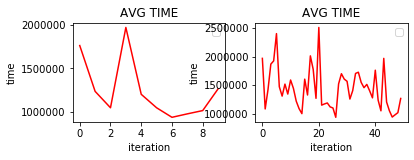

In [323]:
#TIME FOR SELECT5
select5time=list()
for i in range(10):
    print("%d ITERATION "%(i+1))
    start_time = time.process_time_ns()
    select5=session.execute("select title from query5 WHERE tag='Comedy' order by rating desc limit 20 ALLOW FILTERING;")

    print("<-------------------ITERATION %d COMPLETED ----------------->" %(i+1))

    end = time.process_time_ns()
    final = end - start_time
    select5time.append(final)


avgtime5= (sum(select5time)/len(select5time))

sunolikos_mesos_xronos=avgtime1+avgtime2+avgtime3+avgtime4+avgtime5

GRAFIKI = select1time+select2time+select3time+select4time+select5time


print("--- %s nanoseconds ---" % (avgtime5))

print("--- %s SUNOLIKOS MESOS XROROS ---" % (sunolikos_mesos_xronos))

plt.figure(0)
plt.subplot(2, 2, 1)
plt.plot(select5time,color='red')
plt.title("AVG TIME")
plt.ylabel("time")
plt.xlabel("iteration")
plt.legend()


plt.figure(0)
plt.subplot(2, 2, 2)
plt.plot(GRAFIKI,color='red')
plt.title("AVG TIME")
plt.ylabel("time")
plt.xlabel("iteration")
plt.legend()





In [301]:
session.execute("CREATE CUSTOM INDEX employee_firstname_idx ON query4 (title) USING 'org.apache.cassandra.index.sasi.SASIIndex' WITH OPTIONS = {'mode': 'CONTAINS', 'analyzer_class': 'org.apache.cassandra.index.sasi.analyzer.StandardAnalyzer', 'case_sensitive': 'false'};")
